In [26]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

In [27]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [28]:
type(x_train)

numpy.ndarray

In [29]:
print('Training Data Shape    : ', x_train.shape)
print('Training Labels  Shape : ', y_train.shape)
print('Testing Data Shape     : ', x_test.shape)
print('Testing Labels Shape   : ', y_test.shape)

Training Data Shape    :  (60000, 28, 28)
Training Labels  Shape :  (60000,)
Testing Data Shape     :  (10000, 28, 28)
Testing Labels Shape   :  (10000,)


(-0.5, 27.5, 27.5, -0.5)

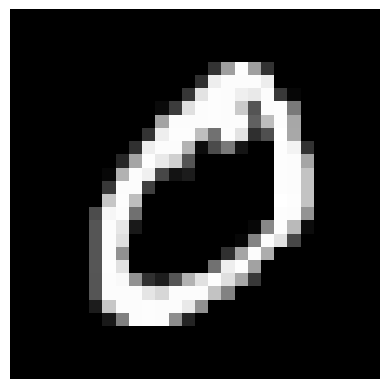

In [30]:
plt.imshow(x_train[1], cmap = 'gray')
plt.axis('off')

In [31]:
np.set_printoptions(linewidth = 300)
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 18

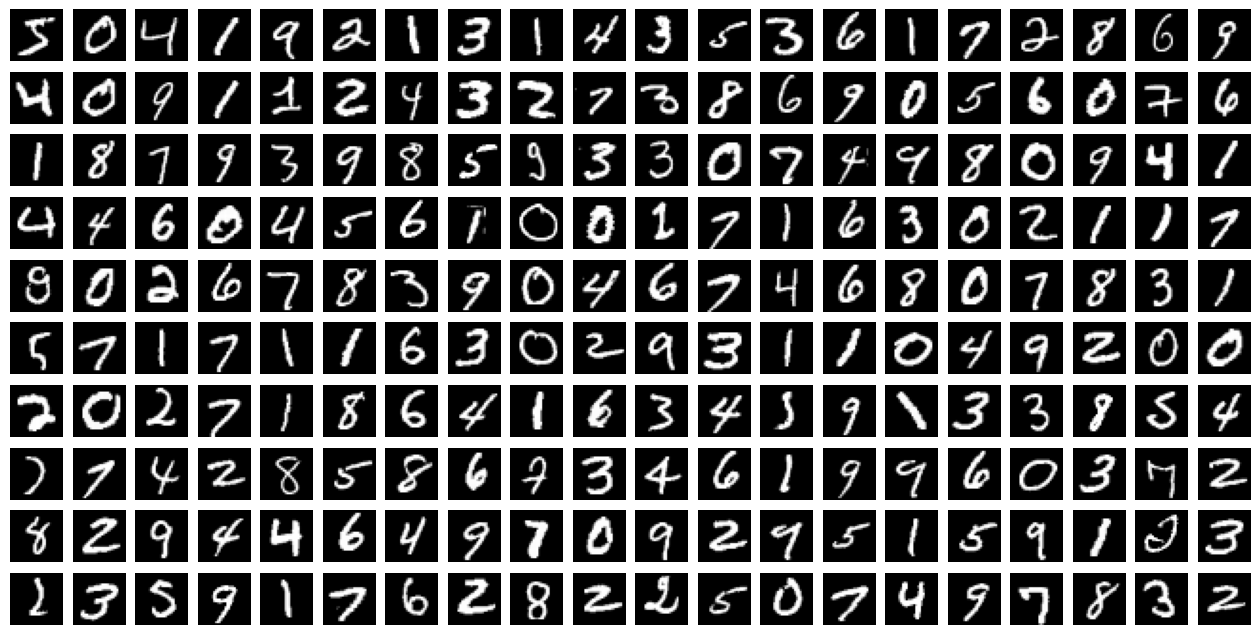

In [32]:
plt.figure(figsize = (16,8))
for i in range(200):
  plt.subplot(10,20, i+1)
  plt.imshow(x_train[i], cmap = 'gray')
  plt.axis('off')

In [33]:
# Normalizing
x_train = x_train/255
x_test  = x_test/255

In [34]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [35]:
# Encoding the labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test  = to_categorical(y_test, num_classes = 10)

In [36]:
x_train = x_train.reshape(60000,28,28,1)
x_test  = x_test.reshape(10000,28,28,1)

In [37]:
print('Training Data Shape    : ', x_train.shape)
print('Training Labels  Shape : ', y_train.shape)
print('Testing Data Shape     : ', x_test.shape)
print('Testing Labels Shape   : ', y_test.shape)

Training Data Shape    :  (60000, 28, 28, 1)
Training Labels  Shape :  (60000, 10)
Testing Data Shape     :  (10000, 28, 28, 1)
Testing Labels Shape   :  (10000, 10)


# Steps to create and train a neural network
1. Create the architecture
2. Compile the model
3. Fit the model

In [46]:
# Creating the architecture
'''
model = tf.keras.models.Sequential([
    Flatten(input_shape = (28,28,1)),
    Dense(200, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(10, activation = 'softmax')
])
'''

model = tf.keras.models.Sequential()
model.add(Flatten(input_shape = (28,28,1)))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 200)               157000    
                                                                 
 dense_19 (Dense)            (None, 100)               20100     
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
Total params: 178110 (695.74 KB)
Trainable params: 178110 (695.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
# Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(),
              metrics = ['accuracy'])

In [48]:
# Fit the model
history = model.fit(
    x_train,
    y_train,
    validation_data = (x_test, y_test),
    epochs = 100,
    batch_size = 1000,
    verbose = 1
)

Epoch 1/100
60/60 [==============================] - 1s 9ms/step - loss: 2.1752 - accuracy: 0.2454 - val_loss: 1.9808 - val_accuracy: 0.5094
Epoch 2/100
60/60 [==============================] - 0s 5ms/step - loss: 1.8083 - accuracy: 0.6186 - val_loss: 1.6015 - val_accuracy: 0.7032
Epoch 3/100
60/60 [==============================] - 0s 5ms/step - loss: 1.4374 - accuracy: 0.7261 - val_loss: 1.2424 - val_accuracy: 0.7593
Epoch 4/100
60/60 [==============================] - 0s 5ms/step - loss: 1.1253 - accuracy: 0.7709 - val_loss: 0.9772 - val_accuracy: 0.7978
Epoch 5/100
60/60 [==============================] - 0s 5ms/step - loss: 0.9103 - accuracy: 0.8027 - val_loss: 0.8059 - val_accuracy: 0.8183
Epoch 6/100
60/60 [==============================] - 0s 5ms/step - loss: 0.7715 - accuracy: 0.8226 - val_loss: 0.6951 - val_accuracy: 0.8368
Epoch 7/100
60/60 [==============================] - 0s 5ms/step - loss: 0.6794 - accuracy: 0.8368 - val_loss: 0.6197 - val_accuracy: 0.8495
Epoch 8/100
6

## Visualizing the training journey

In [58]:
type(history.history)

dict

In [51]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [53]:
acc_train = history.history['accuracy']
acc_val   = history.history['val_accuracy']

loss_train = history.history['loss']
loss_val   = history.history['val_loss']

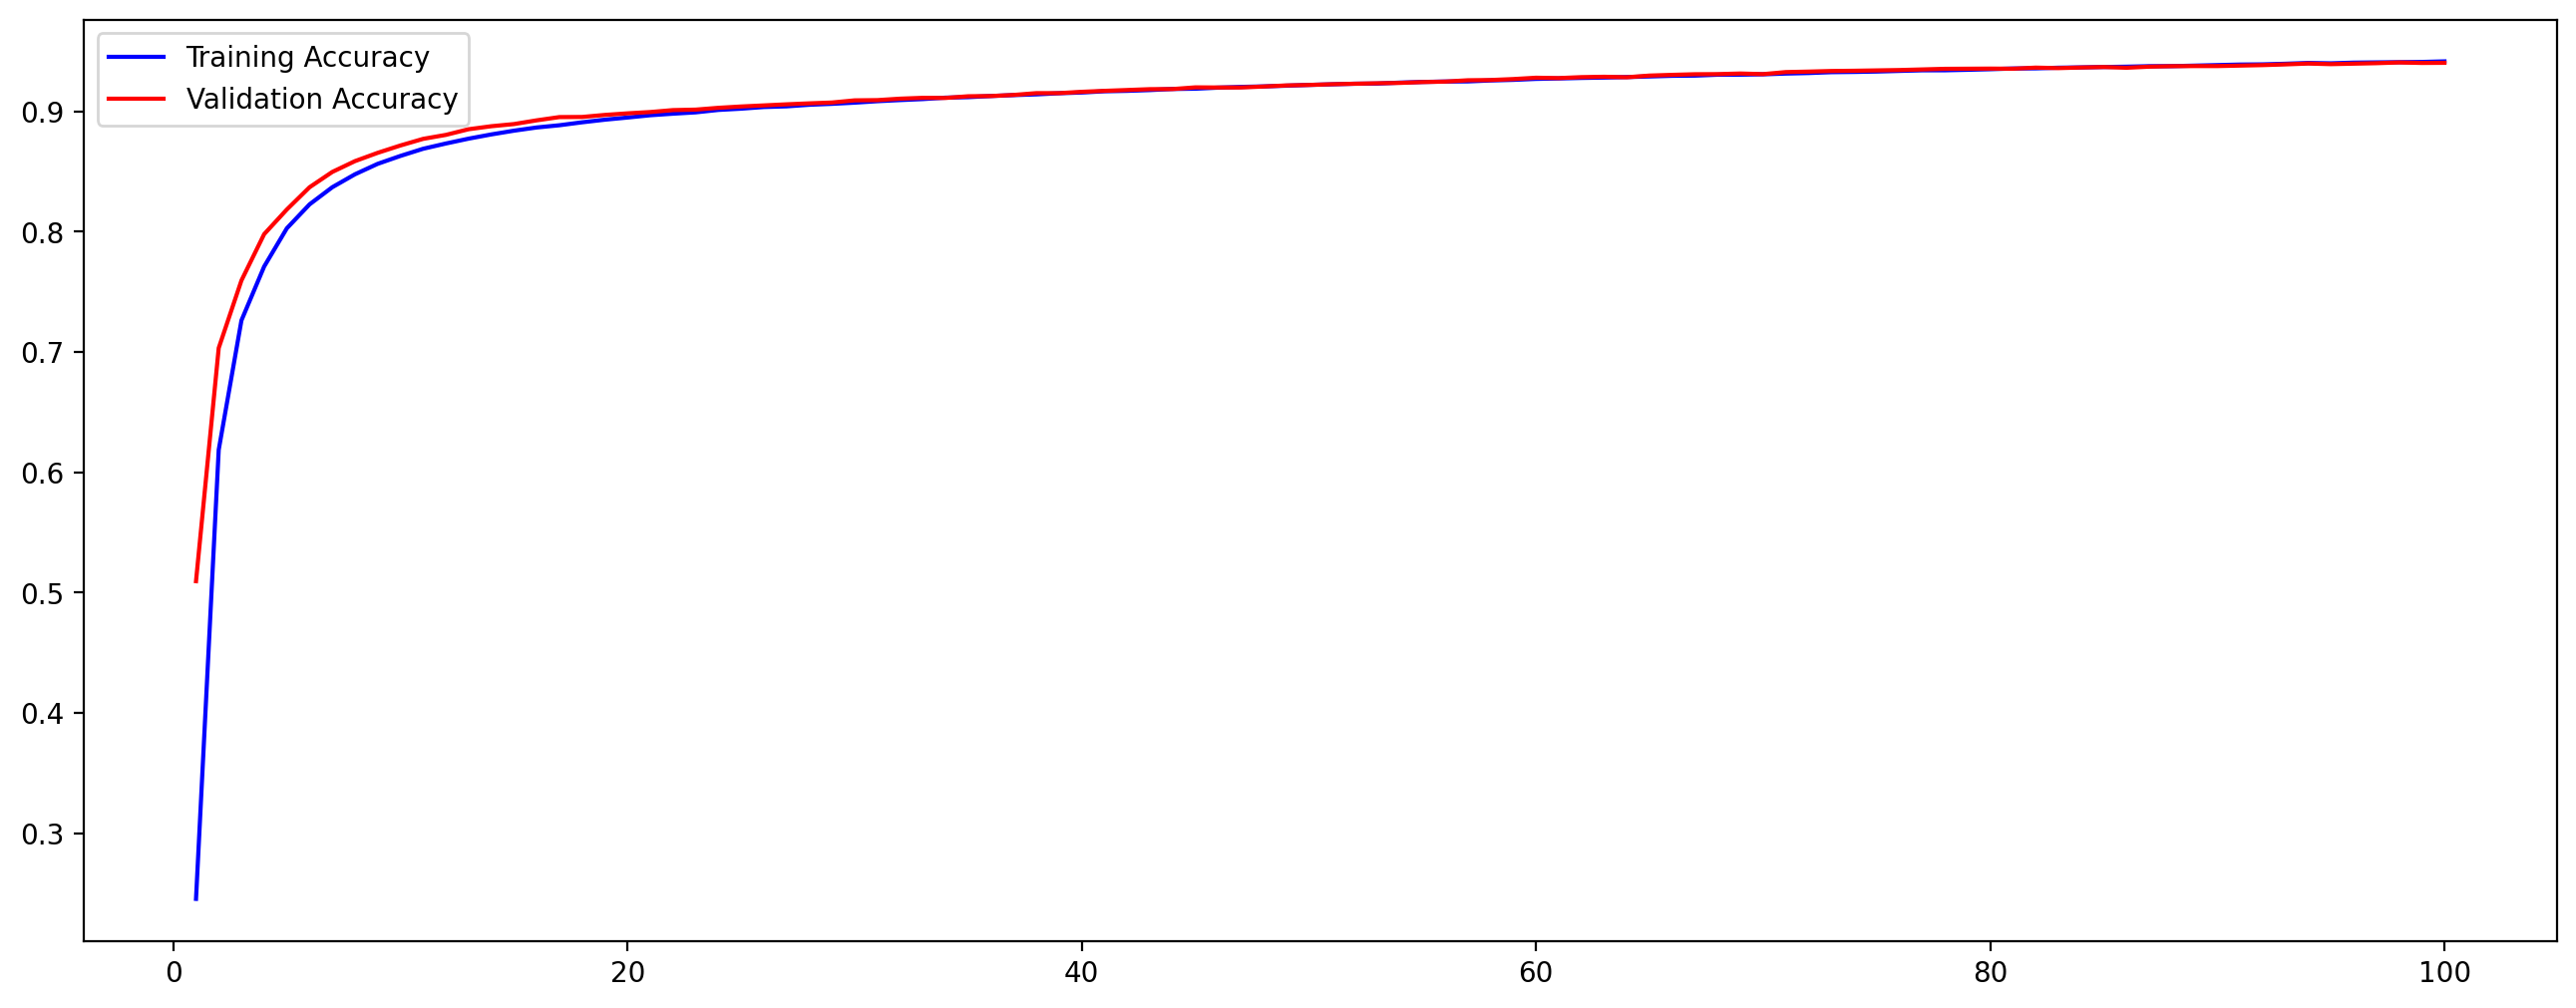

In [56]:
num_epochs = range(1,101)
plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, acc_train, c = 'blue', label = 'Training Accuracy')
plt.plot(num_epochs, acc_val, c = 'red', label = 'Validation Accuracy')
plt.legend()

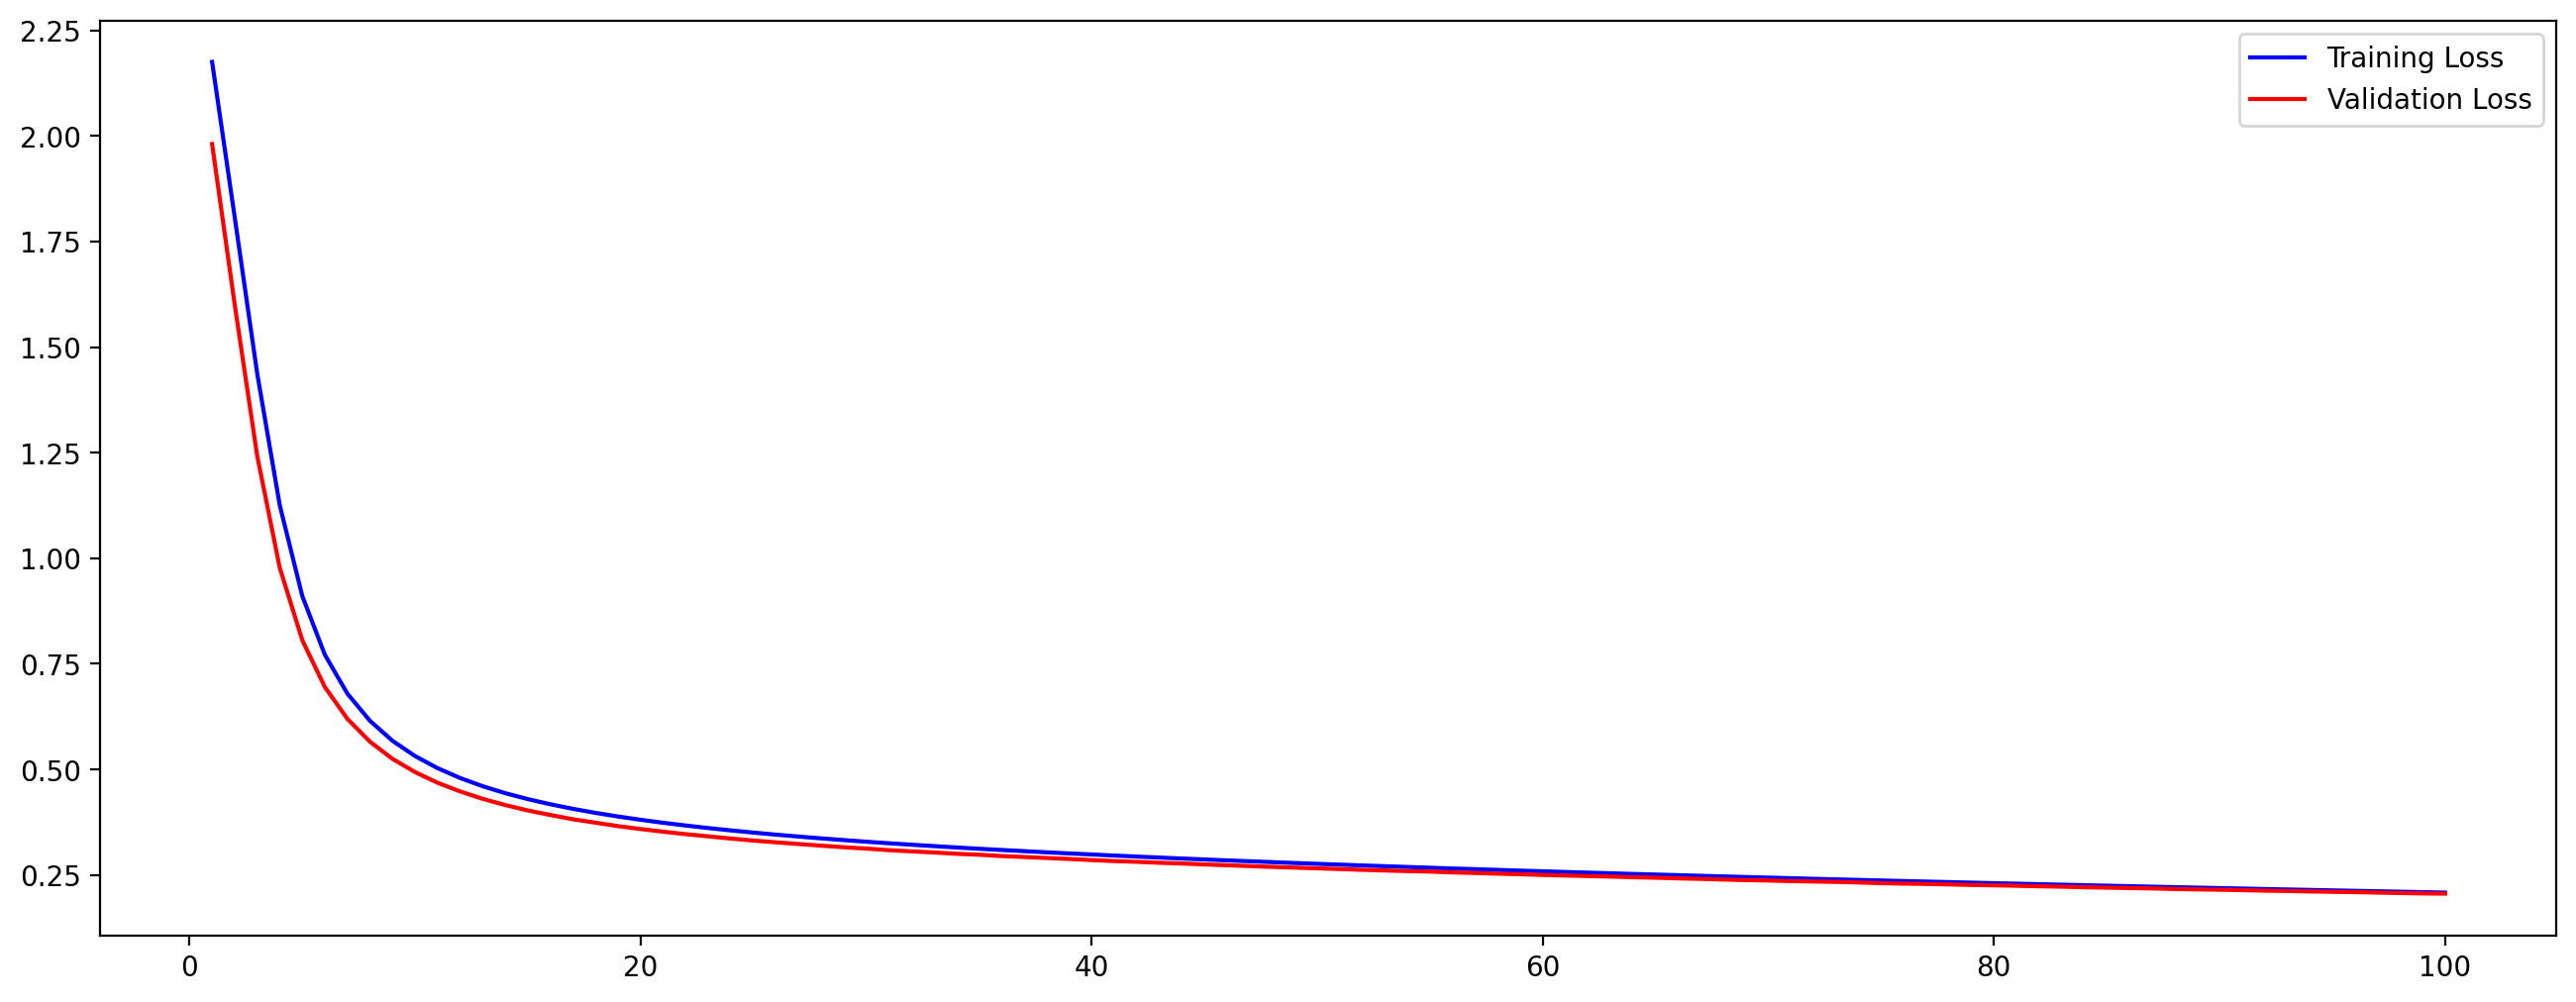

In [57]:
num_epochs = range(1,101)
plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, loss_train, c = 'blue', label = 'Training Loss')
plt.plot(num_epochs, loss_val, c = 'red', label = 'Validation Loss')
plt.legend()

# Making Predictions

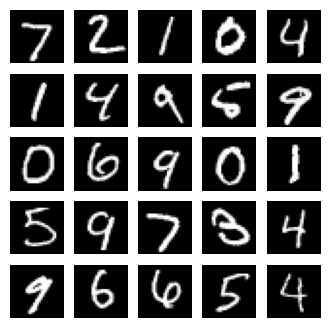

In [62]:
plt.figure(figsize = (4,4))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.imshow(x_test[i], cmap = 'gray')
  plt.axis('off')

In [63]:
model.predict(x_test[1:2])

1/1 [==============================] - 0s 27ms/step


array([[1.2872657e-03, 7.4338051e-05, 9.7616994e-01, 6.6549862e-03, 4.2229590e-08, 4.3807621e-03, 1.0829609e-02, 7.7007813e-09, 6.0291658e-04, 6.8672193e-08]], dtype=float32)

In [67]:
np.argmax(model.predict(x_test[1:2]))

1/1 [==============================] - 0s 35ms/step


2

In [68]:
def predict_digit(x):
  digit = model.predict(x)
  digit = np.argmax(digit)
  print('The digit is the given iamge is : ', digit)

In [70]:
predict_digit(x_test[0:1])

1/1 [==============================] - 0s 28ms/step
The digit is the given iamge is :  7
